<a href="https://colab.research.google.com/github/abir1234-art/TaskTechnoHacks_Task3_Diabetes-Prediction/blob/main/irisclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [4]:
 #loading data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!unzip '/content/drive/MyDrive/iris.zip' -d '/content/drive/MyDrive/'


Archive:  /content/drive/MyDrive/iris.zip
  inflating: /content/drive/MyDrive/Index  
  inflating: /content/drive/MyDrive/bezdekIris.data  
  inflating: /content/drive/MyDrive/iris.data  
  inflating: /content/drive/MyDrive/iris.names  


In [10]:

names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('/content/drive/MyDrive/iris.data', names=names)
df.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


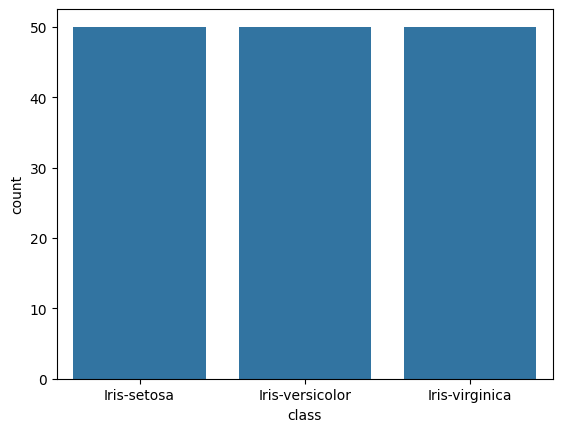

In [12]:
sns.countplot(x='class', data=df)
plt.show()


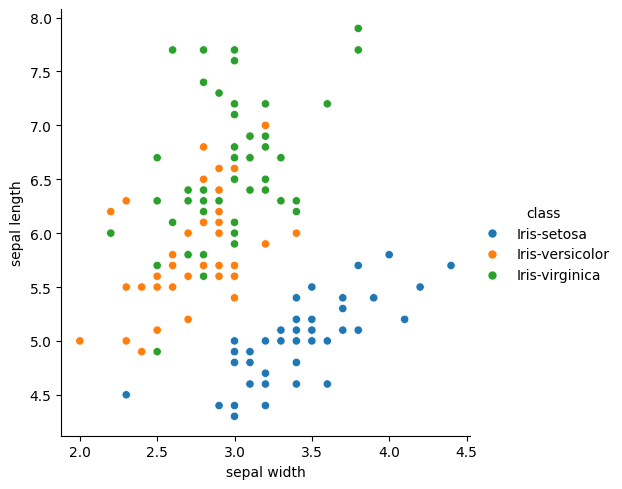

In [13]:

sns.relplot(df, x='sepal width', y='sepal length', hue='class')
plt.show()

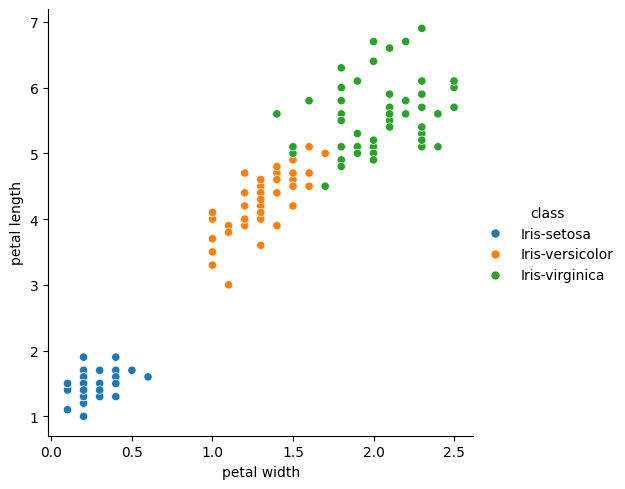

In [14]:
sns.relplot(df, x='petal width', y='petal length', hue='class')
plt.show()

In [15]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df['class'].unique()

array([0, 1, 2])

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape, y.shape)

(150, 4) (150,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((120, 4), (120,))

In [18]:
epochs = 20
optimizer = 'adam'
loss = keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
batch_size = 8

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))


In [20]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/20
15/15 [==============================] - 1s 6ms/step - loss: 1.3228 - accuracy: 0.4000
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 0.9858 - accuracy: 0.4083
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 0.8783 - accuracy: 0.9000
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 0.7716 - accuracy: 0.8333
Epoch 5/20
15/15 [==============================] - 0s 11ms/step - loss: 0.6971 - accuracy: 0.7833
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6349 - accuracy: 0.9000
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 0.6190 - accuracy: 0.6917
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8667
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.8500
Epoch 10/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.9167
Epoch 11/20
15

In [22]:

model.evaluate(x_test, y_test)


1/1 [==============================] - 0s 300ms/step - loss: 0.3282 - accuracy: 1.0000


[0.32817408442497253, 1.0]

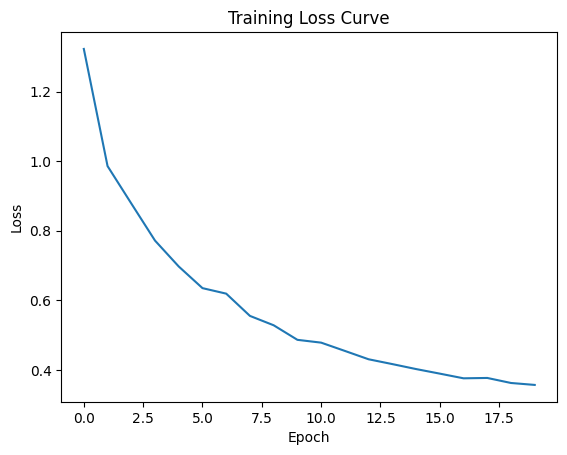

In [23]:
plt.plot(list(range(epochs)), history.history['loss'])
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

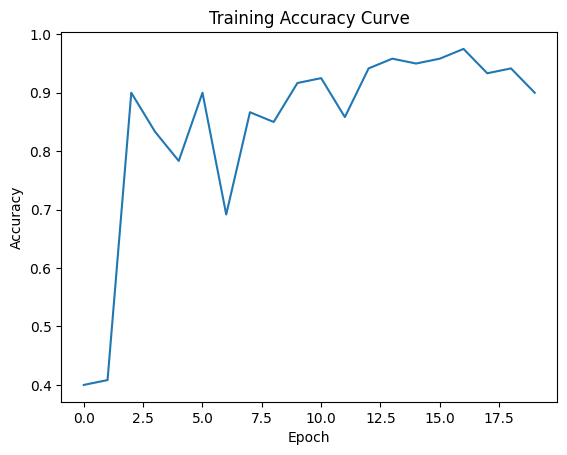

In [24]:

plt.plot(list(range(epochs)), history.history['accuracy'])
plt.title('Training Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
